## Shift in Focus: Exploring Patterns in the Data

After completing the layoffs prediction analysis, the focus of this notebook has shifted to uncovering patterns across the full dataset. Rather than predicting a single variable (e.g., layoffs), the aim is to explore all the data to identify relationships and potential trends.

### Key Objectives:
1. **Understand the Relationships**: Perform Exploratory Data Analysis (EDA) to examine correlations and interactions between the variables.
2. **Dimensionality Reduction**: Use Principal Component Analysis (PCA) to reduce the complexity of the dataset and highlight key patterns.
3. **Unsupervised Learning**: Apply clustering techniques to group similar data points and uncover hidden patterns.
4. **Time Series Exploration**: Leverage the time component of the data (e.g., `date`) to detect trends and seasonality.

### Next Steps:
- We will begin by examining the relationships between the variables using a correlation heatmap.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

# Load the dataset
df = pd.read_csv('../Nestor/SQL/collated_query_v5.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date to maintain temporal order
df = df.sort_values('date')



In [2]:
# Check for missing values and fill with forward fill for time series continuity
df.fillna(method='ffill', inplace=True)
df.fillna(df.mean(), inplace=True)  # For any remaining missing values

# Preview the data
print("Dataset Overview:")
df.info()
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 38 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               51 non-null     datetime64[ns]
 1   laid_off_by_month                                  51 non-null     int64         
 2   funds_raised_by_month                              51 non-null     float64       
 3   mortgage_rate                                      51 non-null     float64       
 4   unemployment_rate                                  51 non-null     float64       
 5   fed_rate                                           51 non-null     float64       
 6   stock_open                                         51 non-null     float64       
 7   stock_high                                         51 non-null     float64       
 8   stoc

C:\Users\ToriS\AppData\Local\Temp\ipykernel_2196\1378954211.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,date,laid_off_by_month,funds_raised_by_month,mortgage_rate,unemployment_rate,fed_rate,stock_open,stock_high,stock_low,stock_close,...,real_estate_loans,total_assets,currency_sa,demand_deposits_sa,monetary_base_currency_nsa,monetary_base_total_nsa,pct_change_consumer_credit_sa,consumer_credit_owned_securitized_sa,consumer_credit_nonfinancial_owned_nsa,consumer_credit_credit_unions_owned_nsa
0,2020-03-01,7850,15530.2,3.4500,4.4,0.65,2974.28,3136.72,2191.86,2584.59,...,4644663.4,18871518.5,1748.5,1818.5,1838.0,3883.1,-5.52,4205893.06,34720.40,495196.85
1,2020-04-01,19821,43862.0,3.3060,14.8,0.05,2498.08,2954.86,2447.49,2912.43,...,4666335.4,19952674.8,1782.1,2019.2,1891.3,4844.9,-18.15,4142276.28,34682.16,491526.93
2,2020-05-01,14674,74191.0,3.2325,13.2,0.05,2869.09,3068.67,2766.64,3044.31,...,4666886.5,20192786.2,1818.2,2131.8,1931.8,5149.4,-5.37,4123726.83,34833.23,492108.55
3,2020-06-01,3926,11724.1,3.1625,11.0,0.08,3038.78,3233.13,2965.66,3100.29,...,4670624.4,20095653.4,1852.7,2220.4,1958.3,5001.8,4.33,4138607.19,34925.07,498296.05
4,2020-07-01,1612,4447.0,3.0160,10.2,0.09,3105.92,3279.99,3101.17,3271.12,...,4691977.2,19928324.5,1881.9,2262.8,1981.7,4700.3,4.87,4155392.51,34909.68,501791.49


In [3]:
import os

# Create folder if it doesn't exist
folder_name = 'exploratory_data_pca'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Correlation heatmap saved in the 'exploratory_data_pca' folder.


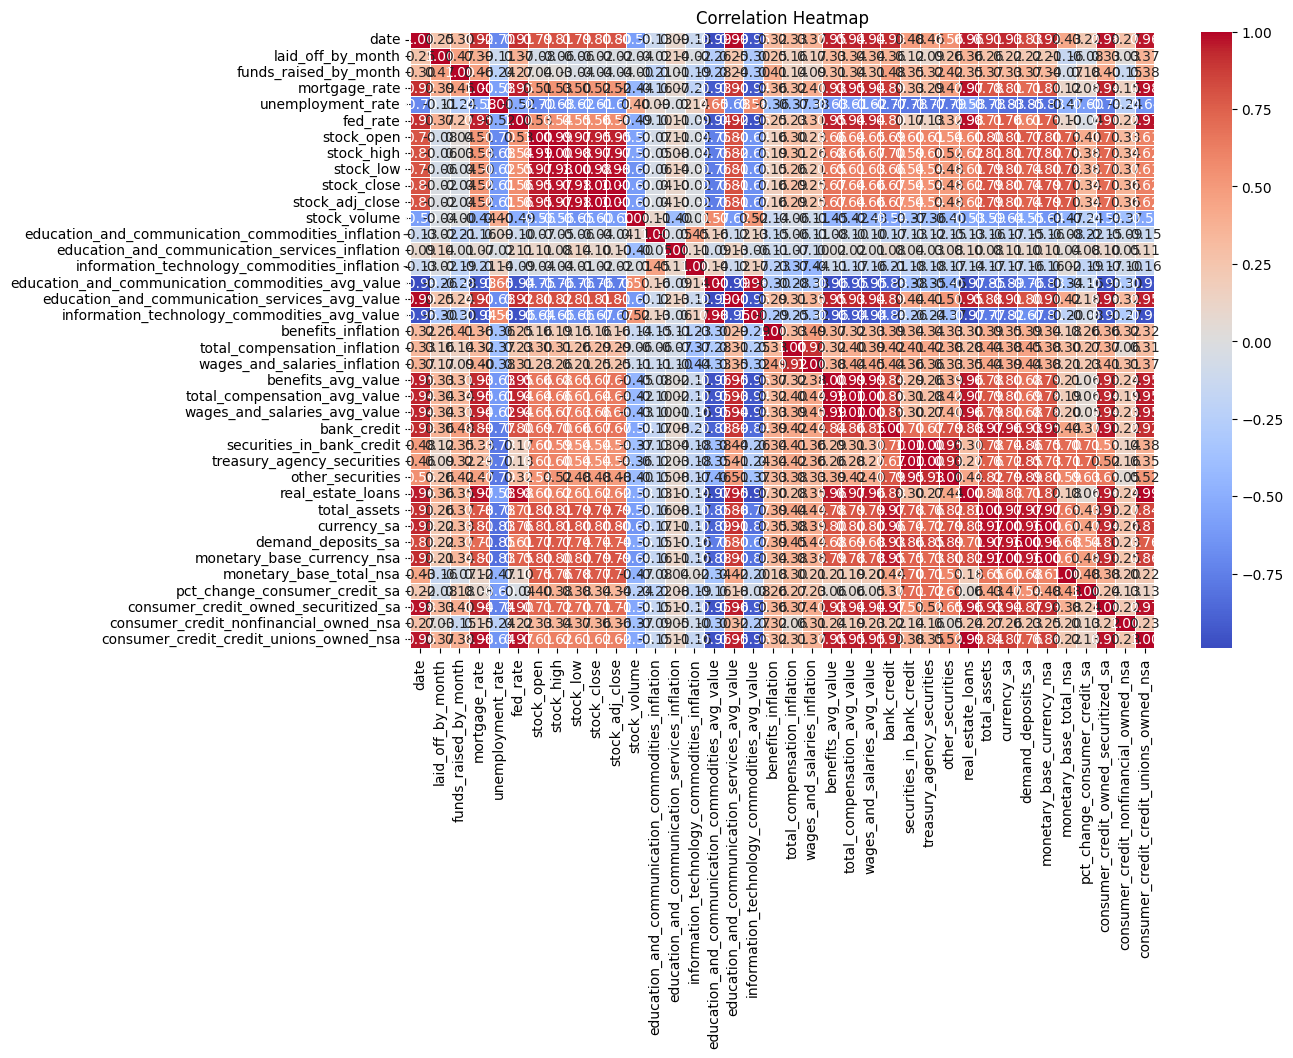

In [4]:
# Step: Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Save the heatmap to the folder
heatmap_plot_path = os.path.join(folder_name, 'correlation_heatmap.png')
plt.savefig(heatmap_plot_path)
print(f"Correlation heatmap saved in the '{folder_name}' folder.")

plt.show()


### Correlation Heatmap Analysis

The correlation heatmap above highlights the relationships between different variables in the dataset:

- **Strong Correlations**: Several variables, particularly the stock-related metrics (e.g., `stock_open`, `stock_close`, `stock_high`, `stock_low`), have strong positive correlations, which is expected as these variables often move together in financial markets.
  
- **Moderate Correlations**: There are also some moderate correlations between variables like `unemployment_rate` and `laid_off_by_month`, as well as `funds_raised_by_month` and other economic factors. These relationships may indicate important economic trends or signals in the data.

- **Weak or Inverse Correlations**: Some inverse correlations are evident, such as the negative relationship between `mortgage_rate` and `laid_off_by_month`, which could suggest an inverse trend between interest rates and layoffs during the observed period.

### Next Steps:
1. **Dimensionality Reduction (PCA)**: Given the high correlations between several variables, we will apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining most of the variance.
  
2. **Clustering Analysis**: Following PCA, we will explore clustering algorithms to detect hidden patterns and group similar data points.

We will start by standardizing the data in preparation for PCA.


In [5]:
# Select features by excluding the 'date' column
X = df.drop(columns=['date'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = scaler.fit_transform(X)

# Confirm the transformed data shape
print("Shape of standardized data:", X_scaled.shape)


Shape of standardized data: (51, 37)


Explained variance plot saved in the 'exploratory_data_pca' folder.


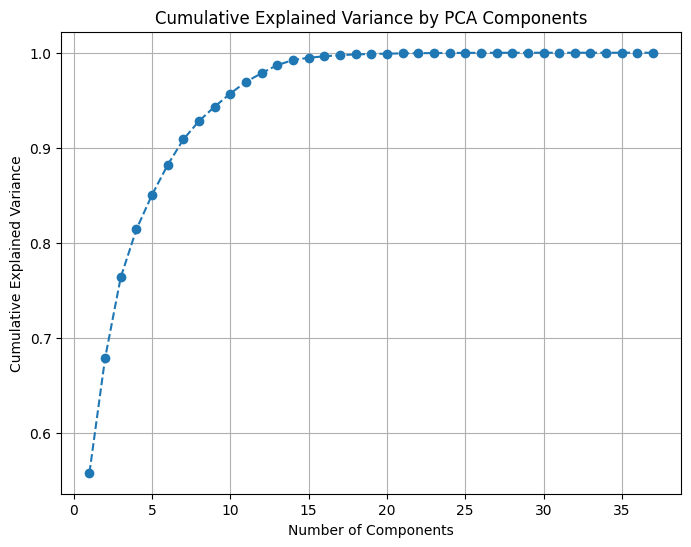

In [6]:
# Initialize PCA model and fit it on the standardized data
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance ratio to decide how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Save the plot to the folder
explained_variance_plot_path = os.path.join(folder_name, 'explained_variance_plot.png')
plt.savefig(explained_variance_plot_path)
print(f"Explained variance plot saved in the '{folder_name}' folder.")

plt.show()

### Cumulative Explained Variance by PCA Components

The plot above illustrates the cumulative explained variance ratio for the principal components in the dataset. This metric helps us understand how much of the dataset's total variance is captured by each additional component.

**Key Insights:**
1. **Explained Variance Growth**:
   - The first few components capture a large portion of the variance. This is indicated by the steep rise in the curve for the first 5-10 components.
   - After about **10 components**, the curve begins to flatten, meaning additional components contribute progressively less variance.

2. **Choosing the Number of Components**:
   - The cumulative variance approaches **100%** as we include more components. However, the curve flattens significantly after around **10 components**, suggesting that these components capture most of the meaningful variance.
   - Based on this curve, we could choose to retain **10 components** to balance between dimensionality reduction and retaining essential information.

### Conclusion:
We can now proceed by applying PCA, retaining around **10 components** to capture the majority of the dataset's variance while reducing dimensionality and complexity.


In [7]:
# Apply PCA, retaining 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Check the shape of the transformed dataset
print(f"Shape of data after applying PCA: {X_pca.shape}")

Shape of data after applying PCA: (51, 10)


In [8]:
# Inspect the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each of the 10 components: {explained_variance}")

Explained variance by each of the 10 components: [0.55812507 0.12072424 0.08492202 0.05045393 0.03640354 0.03144621
 0.02678568 0.0192996  0.01517166 0.01375747]


### Explained Variance Breakdown by PCA Components

The explained variance values give us insight into how much of the total variance in the original data is captured by each of the 10 principal components. Here's the breakdown:

- **Component 1**: Captures about **55.8%** of the total variance.
- **Component 2**: Captures about **12.1%** of the variance.
- **Component 3**: Captures about **8.5%** of the variance.
- **Component 4**: Captures about **5.0%** of the variance.
- **Component 5**: Captures about **3.6%** of the variance.
- **Components 6-10**: Together, they capture about **13.6%** of the variance.

### Key Takeaways:
- **Component 1** is the most influential, capturing over half of the total variance.
- **The first 3 components** together account for more than **76%** of the variance, which is significant.
- **Components 4-10** capture smaller amounts of variance but combined are still important for retaining the full complexity of the data.

### Implications:
- **Dimensionality Reduction**: By reducing the data to 10 components, we’ve retained approximately **96%** of the variance, which means the reduced dataset still reflects most of the original data’s information.
- **Clustering Potential**: The first few components, especially components 1 and 2, will be highly influential when performing clustering on this reduced data.

Next, we will proceed by applying K-Means clustering or another clustering algorithm to explore patterns in these principal components.


Elbow plot saved in the 'exploratory_data_pca' folder.


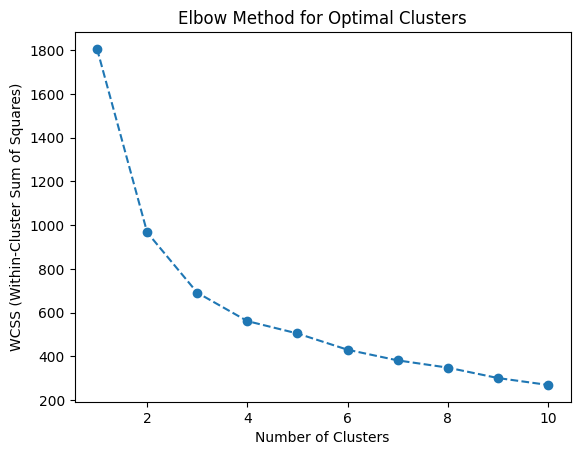

In [9]:
# Step 1: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)  # Use X_pca as the input for KMeans
    wcss.append(kmeans.inertia_)

# Step 2: Plot the Elbow Curve to identify the optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Save the Elbow plot to the folder
elbow_plot_path = os.path.join(folder_name, 'elbow_plot.png')
plt.savefig(elbow_plot_path)
print(f"Elbow plot saved in the '{folder_name}' folder.")

plt.show()

### Elbow Plot for Optimal Number of Clusters

The **Elbow Plot** helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. WCSS measures the compactness of the clusters, and our goal is to minimize it.

In the plot, the steep drop in WCSS occurs between 1 and 3 clusters. After 3 clusters, the curve begins to flatten, indicating that adding more clusters yields diminishing returns in reducing the WCSS.

**Interpretation**: The "elbow" in the plot is at 3 clusters, suggesting that **3 clusters** is likely the optimal number for this dataset.


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.051134  4.393541 -1.544005  1.275106  3.205729 -0.257247  0.470098   
1  9.846285  4.367165 -0.106959 -0.132889  1.565279  0.418865 -0.393324   
2  8.657149  2.804219 -0.328621 -0.057573  0.060895 -0.100986 -0.057486   
3  8.135530  1.560436 -0.580481  0.869593 -0.991590 -1.987938  0.438234   
4  7.248403  1.254580  0.410266 -0.255608 -1.896517  1.541589 -2.495959   

        PC8       PC9      PC10  Cluster  
0 -1.104805 -0.983241  2.153466        2  
1  2.416437  0.941095 -1.873165        2  
2  1.820825  0.198498 -1.054328        2  
3  0.694446  0.143498  0.598193        2  
4 -0.491839 -1.583205  0.798204        2  
K-Means clusters plot saved in the 'exploratory_data_pca' folder.


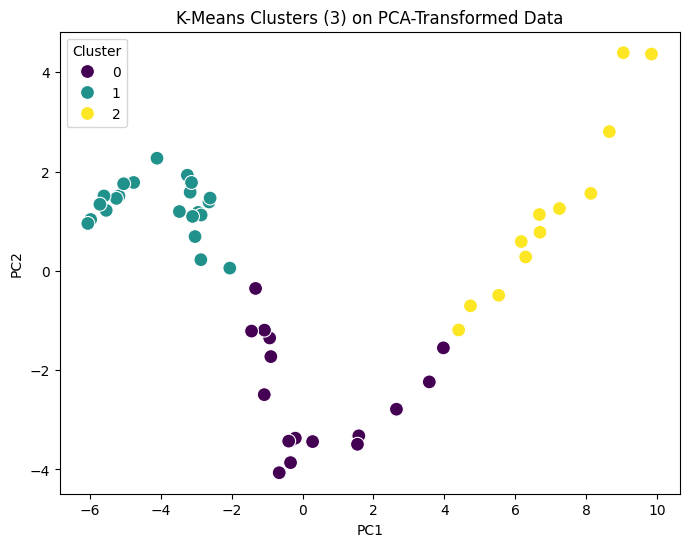

In [10]:
# Step 1: Apply K-Means clustering with 3 clusters (based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Step 2: Get cluster labels
cluster_labels = kmeans.labels_

# Step 3: Add the cluster labels to the PCA-transformed data for analysis
df_pca_clusters = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_pca_clusters['Cluster'] = cluster_labels

# Preview the DataFrame with PCA components and cluster labels
print(df_pca_clusters.head())

# Step 4: Visualize the clusters using the first two principal components (PC1 and PC2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca_clusters, s=100)
plt.title('K-Means Clusters (3) on PCA-Transformed Data')

# Save the K-Means clusters plot to the folder
cluster_plot_path = os.path.join(folder_name, 'kmeans_clusters_pca.png')
plt.savefig(cluster_plot_path)
print(f"K-Means clusters plot saved in the '{folder_name}' folder.")

plt.show()


### K-Means Clustering on PCA-Transformed Data

The plot above shows the results of applying **K-Means Clustering** with 3 clusters to the **PCA-transformed data**. Each point represents a data instance, and the colors indicate the cluster to which the point belongs.

- **PC1 and PC2** represent the first two principal components, which capture the largest variance in the data.
- The three clusters (labeled 0, 1, and 2) are represented by different colors:
  - **Cluster 0** (purple) captures one group of instances.
  - **Cluster 1** (green) shows another distinct group.
  - **Cluster 2** (yellow) identifies a third grouping.

The clustering reveals patterns in the reduced-dimension data and groups similar data points based on their PCA-transformed features. This approach helps to uncover structure in the dataset by reducing noise and focusing on the key dimensions.


In [11]:
# Assign cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Preview the dataset with cluster labels
print("Dataset with assigned cluster labels:")
df.head()


Dataset with assigned cluster labels:


,date,laid_off_by_month,funds_raised_by_month,mortgage_rate,unemployment_rate,fed_rate,stock_open,stock_high,stock_low,stock_close,...,total_assets,currency_sa,demand_deposits_sa,monetary_base_currency_nsa,monetary_base_total_nsa,pct_change_consumer_credit_sa,consumer_credit_owned_securitized_sa,consumer_credit_nonfinancial_owned_nsa,consumer_credit_credit_unions_owned_nsa,Cluster
0,2020-03-01,7850,15530.2,3.4500,4.4,0.65,2974.28,3136.72,2191.86,2584.59,...,18871518.5,1748.5,1818.5,1838.0,3883.1,-5.52,4205893.06,34720.40,495196.85,2
1,2020-04-01,19821,43862.0,3.3060,14.8,0.05,2498.08,2954.86,2447.49,2912.43,...,19952674.8,1782.1,2019.2,1891.3,4844.9,-18.15,4142276.28,34682.16,491526.93,2
2,2020-05-01,14674,74191.0,3.2325,13.2,0.05,2869.09,3068.67,2766.64,3044.31,...,20192786.2,1818.2,2131.8,1931.8,5149.4,-5.37,4123726.83,34833.23,492108.55,2
3,2020-06-01,3926,11724.1,3.1625,11.0,0.08,3038.78,3233.13,2965.66,3100.29,...,20095653.4,1852.7,2220.4,1958.3,5001.8,4.33,4138607.19,34925.07,498296.05,2
4,2020-07-01,1612,4447.0,3.0160,10.2,0.09,3105.92,3279.99,3101.17,3271.12,...,19928324.5,1881.9,2262.8,1981.7,4700.3,4.87,4155392.51,34909.68,501791.49,2


In [12]:
# Analyze how clusters align with key variables
# Group by cluster and calculate the mean for selected variables
cluster_analysis = df.groupby('Cluster').agg({
    'unemployment_rate': 'mean',
    'funds_raised_by_month': 'mean',
    'stock_open': 'mean',
    'stock_close': 'mean',
    'mortgage_rate': 'mean'
})

print("\nCluster Analysis (mean values for key variables):")
print(cluster_analysis)


Cluster Analysis (mean values for key variables):
         unemployment_rate  funds_raised_by_month   stock_open  stock_close  \
Cluster                                                                       
0                 4.311765           42110.617647  4284.102353  4256.506471   
1                 3.722727           45284.668182  4468.300455  4552.531364   
2                 8.550000           13501.583333  3258.797500  3329.091667   

         mortgage_rate  
Cluster                 
0             3.997294  
1             6.803159  
2             2.985000  


Clusters vs key variables plot saved in the 'exploratory_data_pca' folder.


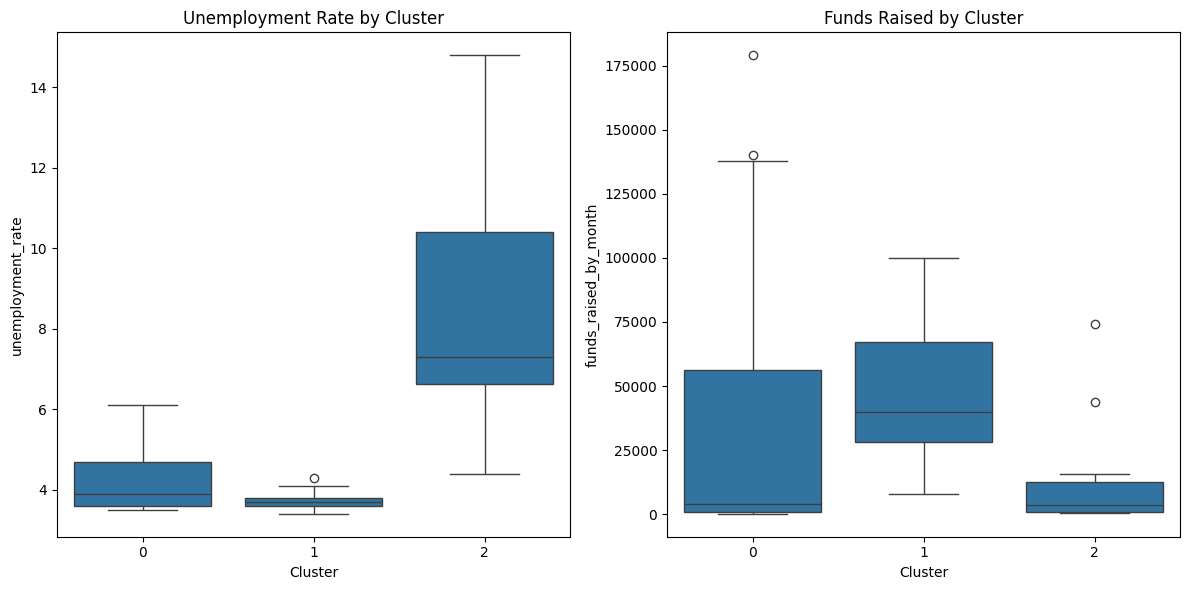

In [13]:
# Visualize clusters against key variables

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot unemployment rate by cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='unemployment_rate', data=df)
plt.title('Unemployment Rate by Cluster')

# Plot funds raised by cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='funds_raised_by_month', data=df)
plt.title('Funds Raised by Cluster')

plt.tight_layout()

# Save the clusters vs key variables plot to the folder
clusters_vs_key_variables_path = os.path.join(folder_name, 'clusters_vs_key_variables.png')
plt.savefig(clusters_vs_key_variables_path)
print(f"Clusters vs key variables plot saved in the '{folder_name}' folder.")

plt.show()


The visualizations show some interesting patterns across the clusters:

1. **Unemployment Rate by Cluster**:
   - Cluster 2 has significantly higher unemployment rates compared to Clusters 0 and 1.
   - Cluster 1 seems to have the lowest and most stable unemployment rate, while Cluster 0 falls somewhere in between.
   - This suggests that certain clusters may be more affected by economic downturns or specific conditions leading to higher unemployment.

2. **Funds Raised by Cluster**:
   - Cluster 0 appears to have the widest range of funds raised, with some outliers reaching over 150,000, while Cluster 2 shows significantly lower values, with a smaller range and lower overall median.
   - Cluster 1 also shows higher median funds raised but without as much variance as Cluster 0.
   - This could indicate that some clusters represent industries or companies with higher financial capabilities, while others may be more constrained.

These plots help to visualize the economic differences between clusters, offering insights into how factors like unemployment and fundraising vary across groups. Further exploration with other key variables, like stock prices and mortgage rates, can deepen our understanding of these relationships. 

### Next Step:
We can now proceed with additional visualizations or further analysis to uncover more patterns or trends.


Additional clusters vs key variables plot saved in the 'exploratory_data_pca' folder.


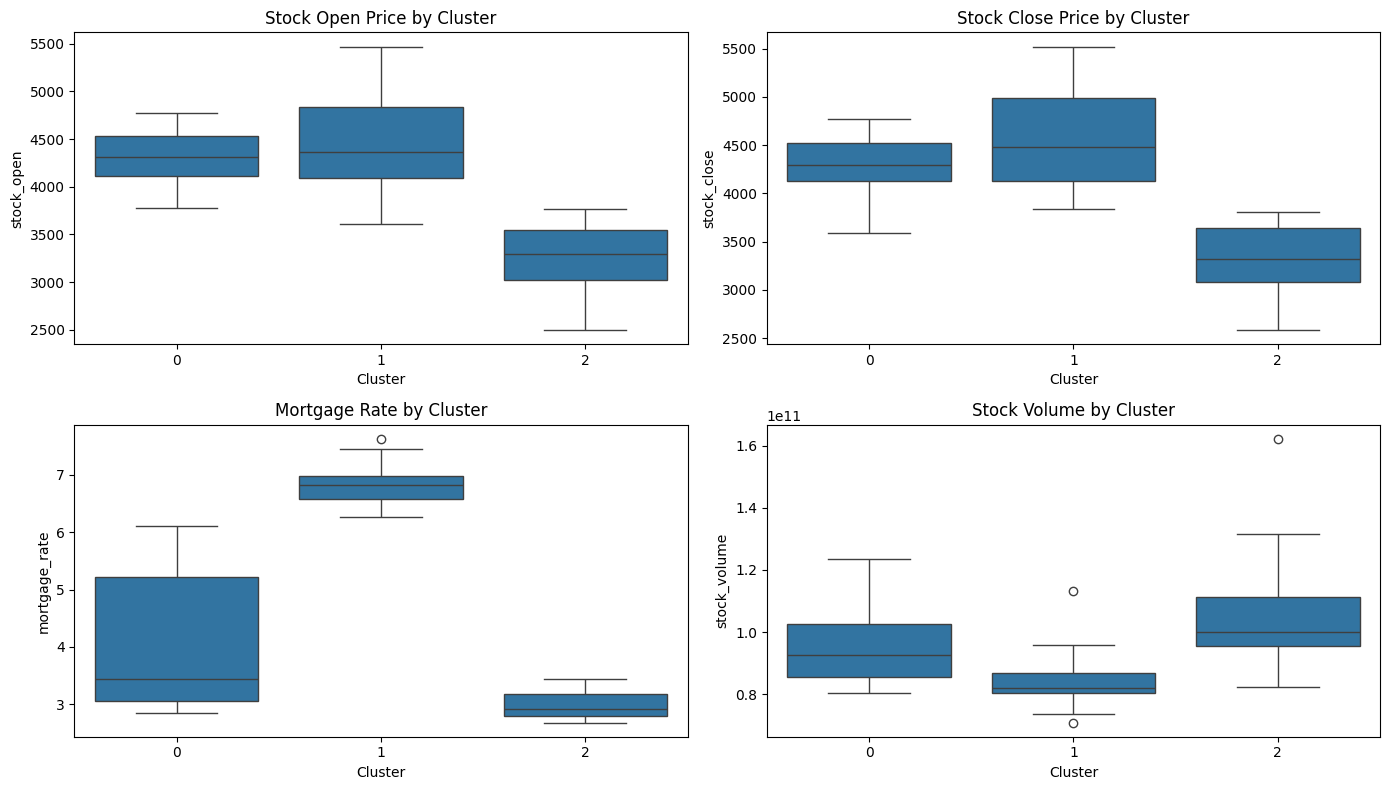

In [14]:
# Visualize clusters against additional key variables

# Set the figure size for additional visualizations
plt.figure(figsize=(14, 8))

# Plot stock open price by cluster
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='stock_open', data=df)
plt.title('Stock Open Price by Cluster')

# Plot stock close price by cluster
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='stock_close', data=df)
plt.title('Stock Close Price by Cluster')

# Plot mortgage rate by cluster
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='mortgage_rate', data=df)
plt.title('Mortgage Rate by Cluster')

# Plot stock volume by cluster
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='stock_volume', data=df)
plt.title('Stock Volume by Cluster')

plt.tight_layout()

# Save the additional clusters vs key variables plot to the folder
additional_clusters_vs_key_variables_path = os.path.join(folder_name, 'additional_clusters_vs_key_variables.png')
plt.savefig(additional_clusters_vs_key_variables_path)
print(f"Additional clusters vs key variables plot saved in the '{folder_name}' folder.")

plt.show()


### Cluster Analysis: Stock Prices and Mortgage Rate

The visualizations provide insights into how stock prices, mortgage rates, and stock volumes vary across clusters:

1. **Stock Open and Close Prices by Cluster**:
   - **Cluster 1** shows the highest stock prices, both in terms of opening and closing values.
   - **Cluster 2** has the lowest stock prices, with a much narrower range compared to Clusters 0 and 1.
   - **Cluster 0** falls between the other two clusters, showing moderate stock prices with relatively little variability.

2. **Mortgage Rate by Cluster**:
   - **Cluster 1** stands out with the highest mortgage rates, which are significantly higher than those in Clusters 0 and 2.
   - **Cluster 2** exhibits the lowest mortgage rates, while **Cluster 0** shows moderate mortgage rates with more variance.

3. **Stock Volume by Cluster**:
   - **Cluster 2** exhibits higher stock volumes with one noticeable outlier.
   - **Cluster 1** shows lower stock volumes, with a few outliers towards the lower end of the scale.
   - **Cluster 0** shows moderate stock volumes, with more stability compared to the other clusters.

These visualizations highlight the economic differences across clusters, particularly how they relate to stock performance and mortgage rates. Further analysis can help uncover potential reasons for these patterns, such as economic conditions or specific industry trends affecting each cluster differently.


In [15]:
# Save the preprocessed dataset to the folder
preprocessed_data_path = os.path.join(folder_name, 'preprocessed_data.csv')
df.to_csv(preprocessed_data_path, index=False)

# Save the PCA-transformed data along with the cluster labels
pca_data_with_clusters_path = os.path.join(folder_name, 'pca_data_with_clusters.csv')

# Combine PCA data and Cluster labels in a DataFrame
df_pca_clusters = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca_clusters['Cluster'] = df['Cluster'].values

# Save the combined data to a CSV file
df_pca_clusters.to_csv(pca_data_with_clusters_path, index=False)

print(f"PCA data with clusters saved in the '{folder_name}' folder.")



PCA data with clusters saved in the 'exploratory_data_pca' folder.
